In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
learning_rate = 0.001	
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")


2024-12-25 14:47:26,620 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'baseline'.
2024-12-25 14:47:26,620 - INFO - Applying baseline augmentations: Resize and Normalize.
2024-12-25 14:47:26,628 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-25 14:47:26,630 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-25 14:47:26,632 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-25 14:47:26,632 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-25 14:47:26,632 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-25 14:47:26,633 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-25 14:47:26,634 - INFO - Class 'fire' has 730 samples.
2024-12-25 14:47:26,635 - INFO - Class 'nofire' has 1157 samples.
2024-12-25 14:47:26,636 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 0.

[INFO] Loading datasets...


2024-12-25 14:47:27,842 - INFO - DataLoaders created successfully.


[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: efficienetnet\n")
print("[INFO] Initializing efficienetnet model...")
model = initialize_model(
    model_name="efficientnet_b0",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: efficienetnet

[INFO] Initializing efficienetnet model...
[INFO] Model initialized successfully!


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
import time

# Start the timer
start_time = time.time()
print("Training started...")

print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    device=device,
    save_path=f"outputs/models/baseline/efficientnet_b0.pth",
    early_stop_patience=12,
    monitor_metric="val_f1",
)
print("[INFO] Training completed successfully!")

# Calculate and display elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Format elapsed time as hours, minutes, and seconds
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)

print(f"Training completed in {hours} hours, {minutes} minutes, and {seconds} seconds.")


Training started...
[INFO] Starting model training...

Starting training...



[INFO] Best model saved with val_f1: 0.8462
Epoch [1]: Train Loss: 0.5552, Train Acc: 0.7128 | Val Loss: 0.4392, Val Acc: 0.8109, Val Recall: 0.8496, Val F1: 0.8462


[INFO] Best model saved with val_f1: 0.8503
Epoch [2]: Train Loss: 0.4298, Train Acc: 0.8129 | Val Loss: 0.3972, Val Acc: 0.8134, Val Recall: 0.8659, Val F1: 0.8503


[INFO] Best model saved with val_f1: 0.8672
Epoch [3]: Train Loss: 0.4051, Train Acc: 0.8203 | Val Loss: 0.3814, Val Acc: 0.8408, Val Recall: 0.8496, Val F1: 0.8672


[INFO] Best model saved with val_f1: 0.8712
Epoch [4]: Train Loss: 0.3794, Train Acc: 0.8325 | Val Loss: 0.3632, Val Acc: 0.8433, Val Recall: 0.8659, Val F1: 0.8712


[INFO] Best model saved with val_f1: 0.8745
Epoch [5]: Train Loss: 0.3734, Train Acc: 0.8384 | Val Loss: 0.3499, Val Acc: 0.8458, Val Recall: 0.8780, Val F1: 0.8745


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [6]: Train Loss: 0.3428, Train Acc: 0.8537 | Val Loss: 0.3586, Val Acc: 0.8383, Val Recall: 0.8821, Val F1: 0.8697


[INFO] Best model saved with val_f1: 0.8755
Epoch [7]: Train Loss: 0.3298, Train Acc: 0.8553 | Val Loss: 0.3475, Val Acc: 0.8458, Val Recall: 0.8862, Val F1: 0.8755


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [8]: Train Loss: 0.3316, Train Acc: 0.8574 | Val Loss: 0.3491, Val Acc: 0.8458, Val Recall: 0.8618, Val F1: 0.8724


[INFO] Best model saved with val_f1: 0.8758
Epoch [9]: Train Loss: 0.3245, Train Acc: 0.8606 | Val Loss: 0.3415, Val Acc: 0.8483, Val Recall: 0.8740, Val F1: 0.8758


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [10]: Train Loss: 0.3321, Train Acc: 0.8484 | Val Loss: 0.3458, Val Acc: 0.8333, Val Recall: 0.8455, Val F1: 0.8613


[INFO] Best model saved with val_f1: 0.8790
Epoch [11]: Train Loss: 0.3409, Train Acc: 0.8479 | Val Loss: 0.3245, Val Acc: 0.8507, Val Recall: 0.8862, Val F1: 0.8790


[INFO] Best model saved with val_f1: 0.8793
Epoch [12]: Train Loss: 0.3434, Train Acc: 0.8458 | Val Loss: 0.3263, Val Acc: 0.8532, Val Recall: 0.8740, Val F1: 0.8793


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [13]: Train Loss: 0.3487, Train Acc: 0.8484 | Val Loss: 0.3279, Val Acc: 0.8483, Val Recall: 0.9024, Val F1: 0.8792


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [14]: Train Loss: 0.2959, Train Acc: 0.8665 | Val Loss: 0.3126, Val Acc: 0.8507, Val Recall: 0.8862, Val F1: 0.8790


[INFO] Best model saved with val_f1: 0.8850
Epoch [15]: Train Loss: 0.3077, Train Acc: 0.8749 | Val Loss: 0.3123, Val Acc: 0.8532, Val Recall: 0.9228, Val F1: 0.8850


[INFO] Best model saved with val_f1: 0.8876
Epoch [16]: Train Loss: 0.3422, Train Acc: 0.8453 | Val Loss: 0.3118, Val Acc: 0.8607, Val Recall: 0.8984, Val F1: 0.8876


[INFO] Best model saved with val_f1: 0.8889
Epoch [17]: Train Loss: 0.3117, Train Acc: 0.8712 | Val Loss: 0.3154, Val Acc: 0.8632, Val Recall: 0.8943, Val F1: 0.8889


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [18]: Train Loss: 0.3396, Train Acc: 0.8484 | Val Loss: 0.3252, Val Acc: 0.8657, Val Recall: 0.8699, Val F1: 0.8880


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [19]: Train Loss: 0.3153, Train Acc: 0.8606 | Val Loss: 0.3207, Val Acc: 0.8582, Val Recall: 0.8780, Val F1: 0.8834


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [20]: Train Loss: 0.3266, Train Acc: 0.8548 | Val Loss: 0.3194, Val Acc: 0.8607, Val Recall: 0.8780, Val F1: 0.8852


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [21]: Train Loss: 0.3158, Train Acc: 0.8548 | Val Loss: 0.3252, Val Acc: 0.8607, Val Recall: 0.8943, Val F1: 0.8871


[INFO] No improvement in val_f1. Patience: 5/12
Epoch [22]: Train Loss: 0.3097, Train Acc: 0.8718 | Val Loss: 0.3242, Val Acc: 0.8532, Val Recall: 0.8862, Val F1: 0.8808


[INFO] No improvement in val_f1. Patience: 6/12
Epoch [23]: Train Loss: 0.3167, Train Acc: 0.8574 | Val Loss: 0.3111, Val Acc: 0.8582, Val Recall: 0.9024, Val F1: 0.8862


[INFO] No improvement in val_f1. Patience: 7/12
Epoch [24]: Train Loss: 0.3199, Train Acc: 0.8654 | Val Loss: 0.3166, Val Acc: 0.8607, Val Recall: 0.8699, Val F1: 0.8843


[INFO] No improvement in val_f1. Patience: 8/12
Epoch [25]: Train Loss: 0.3263, Train Acc: 0.8627 | Val Loss: 0.3273, Val Acc: 0.8657, Val Recall: 0.8780, Val F1: 0.8889


[INFO] Best model saved with val_f1: 0.8911
Epoch [26]: Train Loss: 0.3349, Train Acc: 0.8537 | Val Loss: 0.3257, Val Acc: 0.8657, Val Recall: 0.8984, Val F1: 0.8911


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [27]: Train Loss: 0.2938, Train Acc: 0.8818 | Val Loss: 0.3199, Val Acc: 0.8557, Val Recall: 0.8984, Val F1: 0.8840


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [28]: Train Loss: 0.3070, Train Acc: 0.8707 | Val Loss: 0.3449, Val Acc: 0.8557, Val Recall: 0.8659, Val F1: 0.8802


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [29]: Train Loss: 0.3301, Train Acc: 0.8543 | Val Loss: 0.3305, Val Acc: 0.8582, Val Recall: 0.8740, Val F1: 0.8830


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [30]: Train Loss: 0.3162, Train Acc: 0.8580 | Val Loss: 0.3369, Val Acc: 0.8408, Val Recall: 0.8537, Val F1: 0.8678


[INFO] No improvement in val_f1. Patience: 5/12
Epoch [31]: Train Loss: 0.2929, Train Acc: 0.8675 | Val Loss: 0.3174, Val Acc: 0.8632, Val Recall: 0.9065, Val F1: 0.8902


[INFO] No improvement in val_f1. Patience: 6/12
Epoch [32]: Train Loss: 0.3074, Train Acc: 0.8702 | Val Loss: 0.3485, Val Acc: 0.8507, Val Recall: 0.8496, Val F1: 0.8745


[INFO] No improvement in val_f1. Patience: 7/12
Epoch [33]: Train Loss: 0.3217, Train Acc: 0.8569 | Val Loss: 0.3379, Val Acc: 0.8657, Val Recall: 0.8577, Val F1: 0.8866


[INFO] No improvement in val_f1. Patience: 8/12
Epoch [34]: Train Loss: 0.3106, Train Acc: 0.8670 | Val Loss: 0.3227, Val Acc: 0.8632, Val Recall: 0.8862, Val F1: 0.8880


[INFO] No improvement in val_f1. Patience: 9/12
Epoch [35]: Train Loss: 0.3318, Train Acc: 0.8548 | Val Loss: 0.3414, Val Acc: 0.8507, Val Recall: 0.8577, Val F1: 0.8755


[INFO] No improvement in val_f1. Patience: 10/12
Epoch [36]: Train Loss: 0.3160, Train Acc: 0.8627 | Val Loss: 0.3237, Val Acc: 0.8607, Val Recall: 0.8699, Val F1: 0.8843


[INFO] No improvement in val_f1. Patience: 11/12
Epoch [37]: Train Loss: 0.3175, Train Acc: 0.8617 | Val Loss: 0.3178, Val Acc: 0.8607, Val Recall: 0.8862, Val F1: 0.8862


[INFO] No improvement in val_f1. Patience: 12/12
Epoch [38]: Train Loss: 0.2969, Train Acc: 0.8670 | Val Loss: 0.3242, Val Acc: 0.8557, Val Recall: 0.8821, Val F1: 0.8821
[INFO] Final metrics saved to outputs/models/baseline\final_metrics.json
[INFO] Training stopped after 38 epochs. Best val_f1: 0.8911

[INFO] Training completed successfully!
Training completed in 0 hours, 2 minutes, and 33 seconds.


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name="efficientnet",
    save_base_path="outputs/plots/baseline",

)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/baseline\efficientnet\efficientnet_evaluation.json

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.8791946308724832, 'recall': 0.8238993710691824, 'f1-score': 0.8506493506493507, 'support': 159.0}, 'Fire': {'precision': 0.89272030651341, 'recall': 0.9282868525896414, 'f1-score': 0.91015625, 'support': 251.0}, 'accuracy': 0.8878048780487805, 'macro avg': {'precision': 0.8859574686929466, 'recall': 0.876093111829412, 'f1-score': 0.8804028003246753, 'support': 410.0}, 'weighted avg': {'precision': 0.887474983520953, 'recall': 0.8878048780487805, 'f1-score': 0.8870791841542603, 'support': 410.0}}, 'confusion_matrix': [[131, 28], [18, 233]], 'roc_auc': 0.956977122954722, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[INFO] Training plot saved to outputs/plots/baseline/efficientnet_baseline_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/baseline/efficientnet_baseline_confusion_matrix.png
[INFO] All results saved successfully!


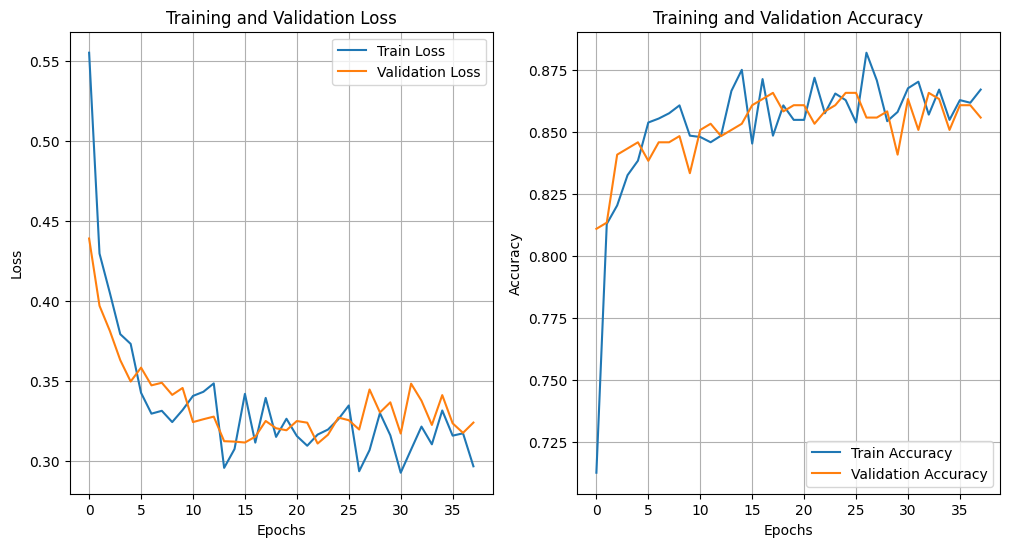

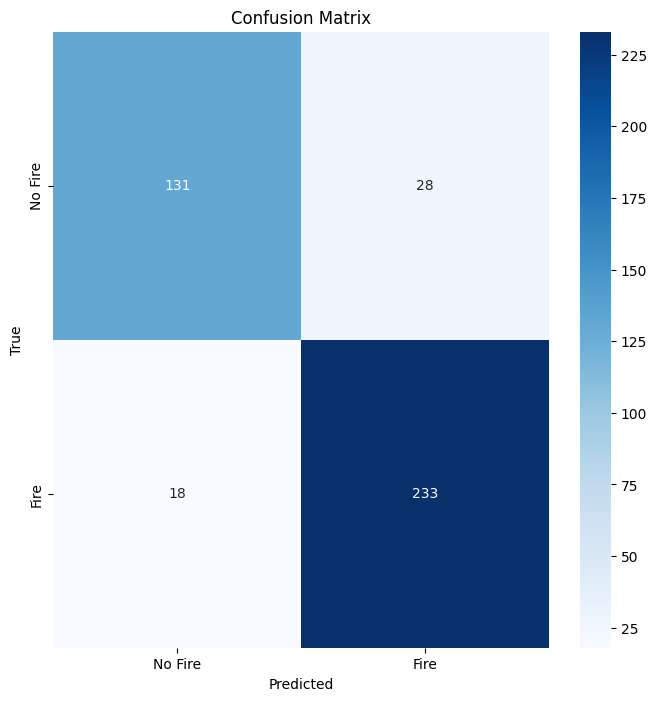

In [10]:
# Training and Validation Curves
plot_training(history, f"outputs/plots/baseline/efficientnet_baseline_training_curve.png")

# Confusion Matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=f"outputs/plots/baseline/efficientnet_baseline_confusion_matrix.png"
)

# Precision-Recall Curve
if "y_probs" in metrics:
    y_true = metrics["y_true"]
    y_probs = [prob[1] for prob in metrics["y_probs"]]
    plot_precision_recall(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/efficientnet_baseline_precision_recall_curve.png"
    )

    # ROC Curve
    plot_roc_curve(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/efficientnet_baseline_roc_curve.png"
    )

print("[INFO] All results saved successfully!")